In [1]:
#Importing required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## Exploration 

In [2]:
#Now we read the CSV file containing our data
data = pd.read_csv('daily_traffic.csv')
data = data.dropna()
data.head()

,date_time,traffic_volume
0,9/29/2016 17:00,5551.0
1,9/29/2016 18:00,4132.0
2,9/29/2016 19:00,3435.0
3,9/29/2016 20:00,2765.0
4,9/29/2016 21:00,2443.0


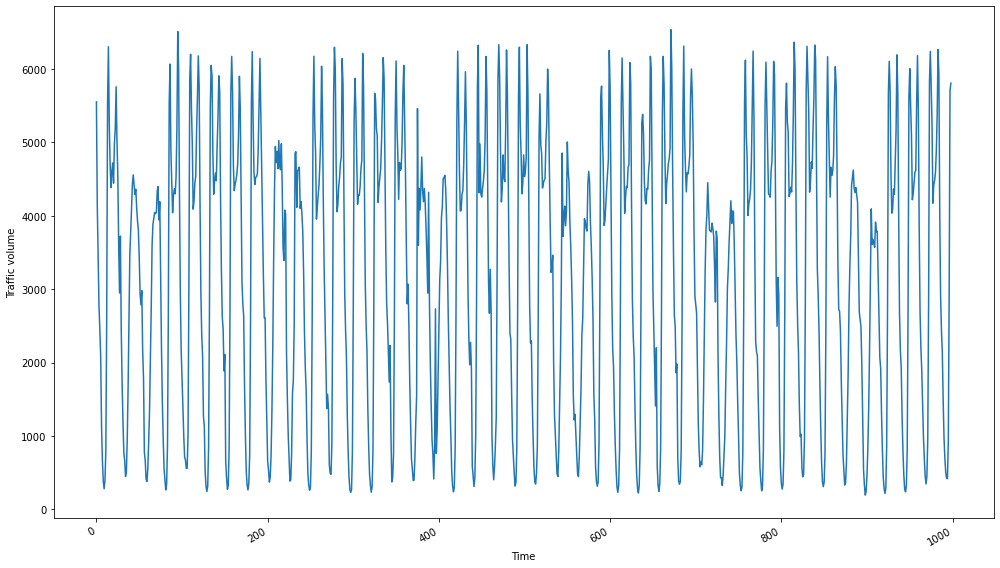

In [3]:
#we can now visualize our data
#Hourly traffic volume on the interstate 94, in Minneapolis, Minnesota 
fig, ax = plt.subplots(figsize=(14, 8))

ax.plot(data['traffic_volume'])
ax.set_xlabel('Time')
ax.set_ylabel('Traffic volume')

# plt.xticks(np.arange(7, 400, 24), ['Friday', 'Saturday', 'Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
# plt.xlim(0, 400)

fig.autofmt_xdate()
plt.tight_layout()

plt.show()

#### From the figure above, we can clearly see that we have two seasonal periods. Let’s zoom in and label the days of the week to identify both periods.

In [4]:
#Hourly traffic volume, westbound, on the interstate 94 in Minneapolis, 
# Minnesota.Here we can see both a daily seasonality (more cars are on the road during the day than during the night), 
# but also a weekly seasonality (more car are on the road Monday to Friday, than during the weekends). 
fig, ax = plt.subplots(figsize=(14, 8))

ax.plot(data['traffic_volume']
ax.set_xlabel('Time')
ax.set_ylabel('Traffic volume')

plt.xticks(np.arange(7, 400, 24), ['Friday', 'Saturday', 'Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
plt.xlim(0, 400)

fig.autofmt_xdate()
plt.tight_layout()

plt.show()

SyntaxError: invalid syntax (Temp/ipykernel_16916/664101278.py, line 7)

#### 1.Of course, we recognize the plot from the beginning of this article and notice that the traffic volume is indeed lower during the weekend than during the weekdays. Also, we see a daily seasonality, with traffic being heavier during the day than at night.

#### 2.Therefore, we have two periods: the daily period has a length of 24 hours, and the weekly period has a length of 168 hours. Let’s keep that in mind as we move on to modeling.



## Modeling 

In [5]:
#We are now ready to start modeling our data. Here, we use the sktime package. I just discovered this framework which brings many statistical and machine learning methods for time series. It also uses a similar syntax convention to scikit-learn, making it easy to use.
#The first step is to define our target and define the forecast horizon. Here, the target is the traffic volume itself. For the forecast horizon, we wish to predict one week of data. Since we have hourly data, we must then predict 168 timesteps (7 * 24) into the future.
y = data['traffic_volume']
fh = np.arange(1, 168)

In [6]:
pip install sktime

FileNotFoundError: [WinError 2] The system cannot find the file specified

In [8]:
# Then, we split our data into a training set and a test set. We will keep the last week of data as a test set in order to evaluate our predictions.
# Here, we use the temporal_train_test_split function from sktime
from sktime.forecasting.model_selection import temporal_train_test_split

y_train, y_test = temporal_train_test_split(y, test_size=168)

ModuleNotFoundError: No module named 'sktime'

NameError: name 'y_train' is not defined

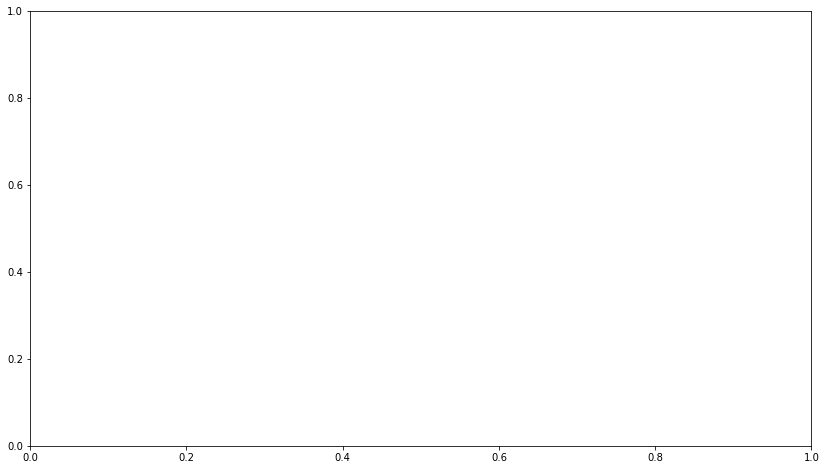

In [7]:
#Optionally, we can visualize our test set
fig, ax = plt.subplots(figsize=(14, 8))

ax.plot(y_train, ls='-', label='Train')
ax.plot(y_test, ls='--', label='Test')
ax.set_xlabel('time')
ax.set_ylabel('Daily traffic volu,e')
ax.legend(loc='best')

fig.autofmt_xdate()
plt.tight_layout()

plt.show()

#### Visualizing the training set and test set. The test is simply the last week of data, as shown by the dashed orange line. The rest is used for fitting the models.

### Baseline 

In [2]:
# Before we implement our more complex BATS and TBATS models, it’s always a good idea to have a baseline model. That way, we can determine if our more complex forecasting methods are actually performant.
# Here, the simplest baseline I can think of is simply repeating the last week of data from the training set into the future.

In [12]:
y_pred_baseline = y_train[-168:].values

### BATS 

In [3]:
# Now that we have a baseline, let’s move on to implementing the BATS model.
# We first import the BATS model from sktime. Then, we specify the parameters of the model for training. 
# Here, we want to use the Box-Cox transformation as we are dealing with non-linear data. 
# Then, since our dataset does not have an apparent trend, we remove those components from the model. 
# Finally, we specify the seasonal periods, which are 24 (for the daily seasonality) and 168 (for the weekly seasonality).
# Once the model is specified, we simply fit it on the training set and generate the predictions over the forecast horizon.
# All of the steps outlined above translate into the code below.

In [16]:
pip install sktime[all_extras]

  Created wheel for filterpy: filename=filterpy-1.4.5-py3-none-any.whl size=110474 sha256=0e429bad3e480ec72f8e9e5896aa4b19c6e88a48fe89f6f012cec48e74525fb3
  Stored in directory: c:\users\gowth\appdata\local\pip\cache\wheels\53\e6\de\a09ea01e923aaf88b9f8c7c44329e857b2c1a31901167e55e6
  Created wheel for pykalman: filename=pykalman-0.9.5-py3-none-any.whl size=48462 sha256=be964e23454c3b3637f3627a1e74bcea68bdd178878899d5cda9148ba923c322
  Stored in directory: c:\users\gowth\appdata\local\pip\cache\wheels\7a\68\21\675239322d2bb2e8e1fa317d4bd7b5566a4e82780b25a27f7a
  Created wheel for pymeeus: filename=PyMeeus-0.5.12-py3-none-any.whl size=732018 sha256=cfb550ffe5c0643d1758f6fdbbbf0a33d1b2540f80ddb82e34bd73180e33c3f9
  Stored in directory: c:\users\gowth\appdata\local\pip\cache\wheels\04\1f\e5\8dd0c661cd8d252817655dc14a84f7ae045d6616594145aa81
  Created wheel for pyod: filename=pyod-1.0.7-py3-none-any.whl size=181103 sha256=b94dc32bb90b021b32e064c8b6a4f7beba809387924c55c4cdb07e8af97ede93
  S

ERROR: Could not install packages due to an OSError: [WinError 5] Access is denied: 'C:\\Users\\gowth\\anaconda3\\Lib\\site-packages\\~umpy\\core\\_multiarray_tests.cp39-win_amd64.pyd'
Consider using the `--user` option or check the permissions.



In [19]:
pip install tbats

  Using cached tbats-1.1.2-py3-none-any.whl (43 kB)
Note: you may need to restart the kernel to use updated packages.


In [20]:
from sktime.forecasting.bats import BATS

forecaster = BATS(use_box_cox=True,
                  use_trend=False,
                  use_damped_trend=False,
                  sp=[24, 168])
forecaster.fit(y_train)

y_pred_BATS = forecaster.predict(fh)

### TBATS 

In [21]:
#Forecasting using TBATS turns out to be exactly like using BATS,only now we use TBATS!
from sktime.forecasting.tbats import TBATS

forecaster = TBATS(use_box_cox=True,
                   use_trend=False,
                   use_damped_trend=False,
                   sp=[24, 168])
forecaster.fit(y_train)

y_pred_TBATS = forecaster.predict(fh)

In [ ]:
# Evaluating the performance
# At this point, we have predictions from our baseline model, BATS, and TBATS. We are then ready to visualize the predictions and see which model performs best.
# Visualizing the predictions gives the following plot.

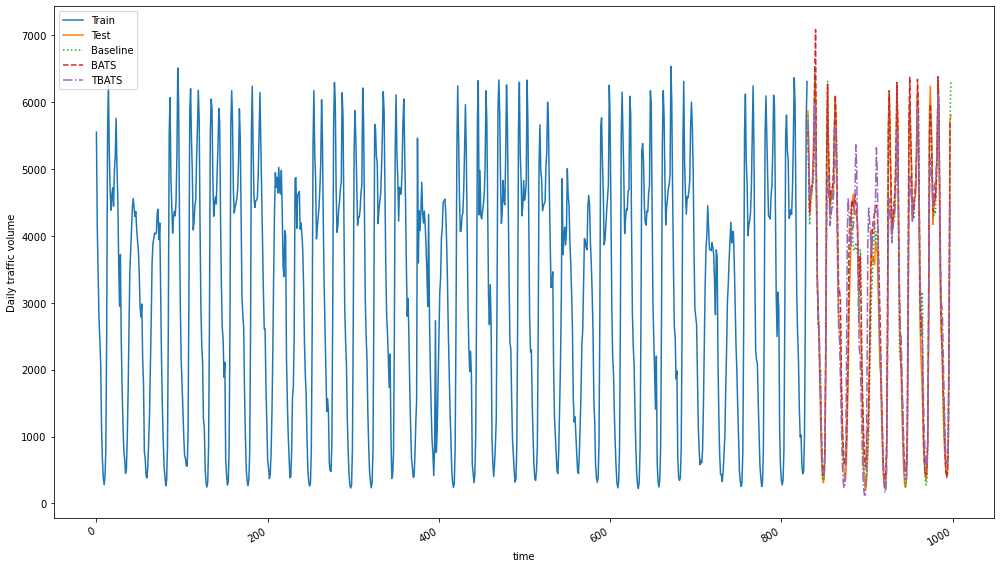

In [22]:
fig, ax = plt.subplots(figsize=(14, 8))

ax.plot(y_train, ls='-', label='Train')
ax.plot(y_test, ls='-', label='Test')
ax.plot(y_test.index, y_pred_baseline, ls=':', label='Baseline')
ax.plot(y_pred_BATS, ls='--', label='BATS')
ax.plot(y_pred_TBATS, ls='-.', label='TBATS')
ax.set_xlabel('time')
ax.set_ylabel('Daily traffic volume')
ax.legend(loc='best')

fig.autofmt_xdate()
plt.tight_layout()

plt.show()

#### Forecasting the next 168 hours of traffic volume. We can see that all models seem to generate similar predictions, as the lines overlap one another. It is hard to know which model performs best by looking at the plot. 

In [ ]:
# Looking at the figure above, it seems that all of our models generate very similar predictions, as the lines are overlapping. It is very hard to determine which model performs best just by looking at the plot.
# We can optionally zoom in on the test set to better visualize the predictions.

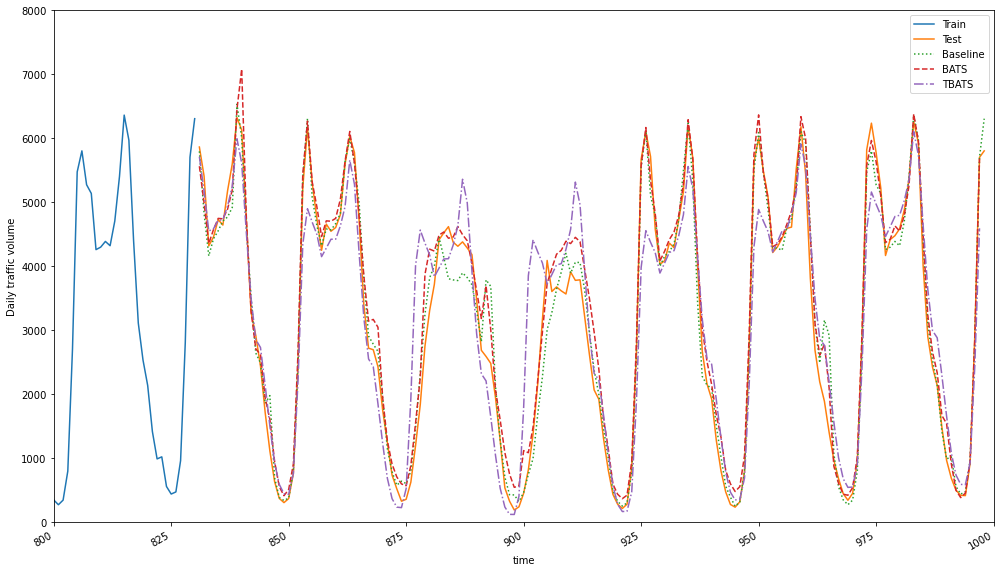

In [23]:
# Zooming in on the test set. Here, it seems that BATS does a great job at modeling both seasonalities, whereas TBATS sometimes overshoots or undershoots. 
# Note that the baseline also follows the actual values very well.
fig, ax = plt.subplots(figsize=(14, 8))

ax.plot(y_train, ls='-', label='Train')
ax.plot(y_test, ls='-', label='Test')
ax.plot(y_test.index, y_pred_baseline, ls=':', label='Baseline')
ax.plot(y_pred_BATS, ls='--', label='BATS')
ax.plot(y_pred_TBATS, ls='-.', label='TBATS')
ax.set_xlabel('time')
ax.set_ylabel('Daily traffic volume')
ax.legend(loc='best')

fig.autofmt_xdate()
plt.tight_layout()

plt.xlim(800, 1000)
plt.ylim(0, 8000)

plt.show()

#### 1.Looking at the figure above, we first notice that both models indeed model a double seasonality, which is great in itself! Also, it seems that BATS does a better job at predicting the future, since TBATS seems to sometimes overshoot or undershoot. Note also that the baseline model closely follows the curve of actual values.
#### 2.We now compute an error metric to determine the best model and compare their performance. In this case, we use the mean absolute percentage error (MAPE), for its ease of interpretation. Recall that the closer the MAPE is to 0, the better the performance.
#### 3.MAPE is not yet implemented in scikit-learn, so we define the function ourselves.

In [25]:
def mape(y_true, y_pred):
    return round(np.mean(np.abs((y_true - y_pred) / y_true)) * 100,2)

In [ ]:
#Then, we simply compute the performance of each model and visualize it in bar chart.

In [26]:
mape_baseline = mape(y_test, y_pred_baseline)
mape_BATS = mape(y_test, y_pred_BATS)
mape_TBATS = mape(y_test, y_pred_TBATS)

print(f'MAPE from baseline: {mape_baseline}')
print(f'MAPE from BATS: {mape_BATS}')
print(f'MAPE from TBATS: {mape_TBATS}')

MAPE from baseline: 11.97
MAPE from BATS: 19.58
MAPE from TBATS: 29.53


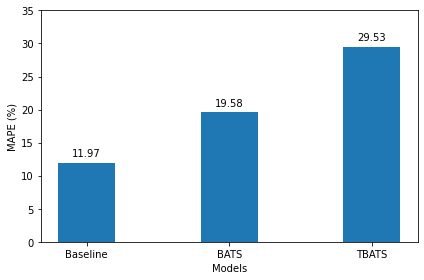

In [27]:
#MAPE of all models. Here, the baseline model achieves the best performance as it has the lowest MAPE. 
fig, ax = plt.subplots()

x = ['Baseline', 'BATS', 'TBATS']
y = [mape_baseline, mape_BATS, mape_TBATS]

ax.bar(x, y, width=0.4)
ax.set_xlabel('Models')
ax.set_ylabel('MAPE (%)')
ax.set_ylim(0, 35)

for index, value in enumerate(y):
    plt.text(x=index, y=value + 1, s=str(round(value,2)), ha='center')

plt.tight_layout()

### From the figure above, we can see that BATS performed better than TBATS, which is to be expected as we observed from the plot. However, we see that the baseline model is the best performing model, achieving a MAPE of 11.97%.